<a href="https://colab.research.google.com/github/hadassah-olive/portfolio/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smoking vs Non-Smoking: A Data Science Intervention**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df= pd.read_csv("/content/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [144]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [145]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**##NO NULL VALUES IN THE DATASET**

In [147]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [148]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


GENDER: ['M' 'F']
AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE : [2 1]
ALLERGY : [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


In [149]:
df['GENDER'].replace(['M', 'F'],
                        [1, 2], inplace=True)
df['LUNG_CANCER'].replace(['YES', 'NO'],
                        [1, 2], inplace=True)


<ipython-input-149-7e0995b1b95a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GENDER'].replace(['M', 'F'],
<ipython-input-149-7e0995b1b95a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'].replace(['M', 'F'],
<ipython-input-149-7e0995b1b95a>:3: FutureWarning: A value is trying t

In [150]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [151]:
df['SMOKING'].value_counts()


,count
SMOKING,
2,174
1,135


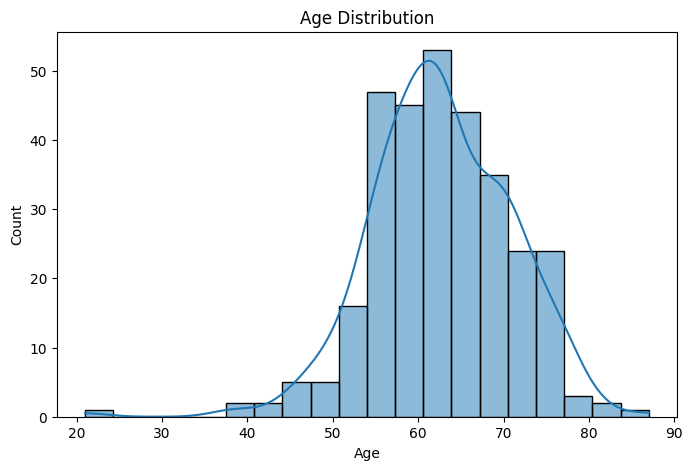

In [152]:
plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


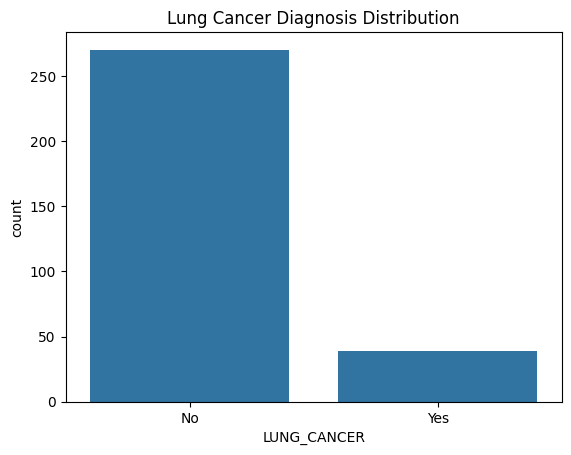

In [153]:
sns.countplot(x='LUNG_CANCER', data=df)
plt.title("Lung Cancer Diagnosis Distribution")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()


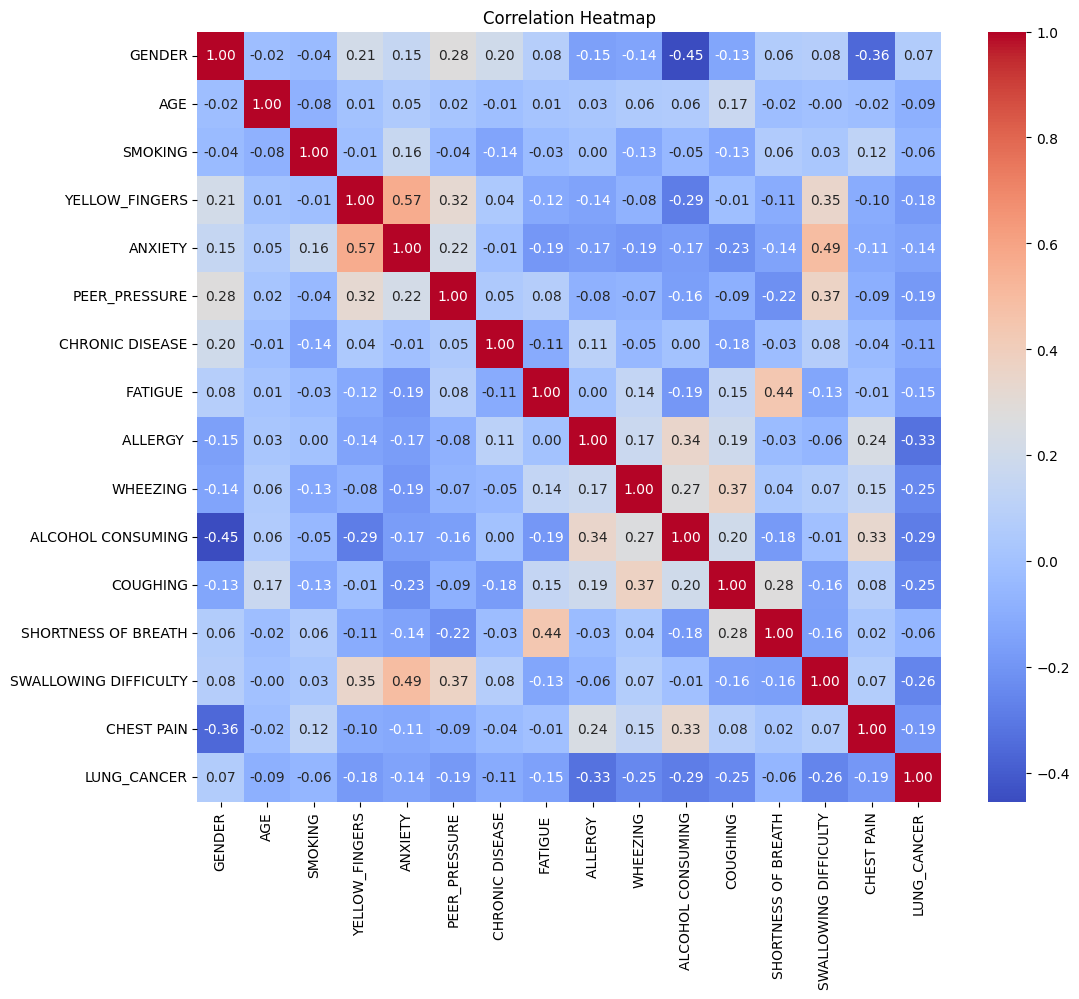

In [154]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Smoking Status Distribution:
SMOKING
2    174
1    135
Name: count, dtype: int64

Lung cancer cases by smoking status:
LUNG_CANCER    1   2
SMOKING             
1            115  20
2            155  19


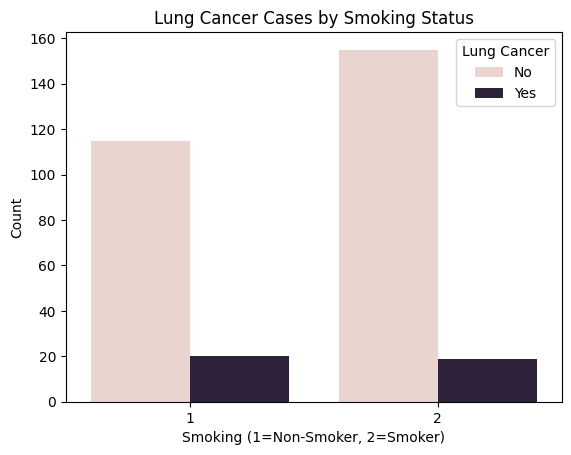

In [155]:
print("Smoking Status Distribution:")
print(df['SMOKING'].value_counts())

print("\nLung cancer cases by smoking status:")
print(pd.crosstab(df['SMOKING'], df['LUNG_CANCER']))

sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title("Lung Cancer Cases by Smoking Status")
plt.xlabel("Smoking (1=Non-Smoker, 2=Smoker)")
plt.ylabel("Count")
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()


In [156]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled['AGE'] = scaler.fit_transform(X[['AGE']])

from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

smokers_df = df[df['SMOKING'] == 2].copy()
non_smokers_df = df[df['SMOKING'] == 1].copy()

logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred))



Logistic Regression - Classification Report
              precision    recall  f1-score   support

           1       0.93      0.96      0.95        54
           2       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [158]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train_scaled, y_train)

y_pred = dt_classifier.predict(X_test_scaled)

print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred))



Decision Tree - Classification Report
              precision    recall  f1-score   support

           1       0.96      0.93      0.94        54
           2       0.60      0.75      0.67         8

    accuracy                           0.90        62
   macro avg       0.78      0.84      0.81        62
weighted avg       0.91      0.90      0.91        62



In [159]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred))



Random Forest - Classification Report
              precision    recall  f1-score   support

           1       0.95      0.96      0.95        54
           2       0.71      0.62      0.67         8

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62



In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN - Classification Report")
print(classification_report(y_test, y_pred))



KNN - Classification Report
              precision    recall  f1-score   support

           1       0.93      0.96      0.95        54
           2       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

print("Gaussian Naive Bayes - Classification Report")
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes - Classification Report
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        54
           2       0.62      0.62      0.62         8

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



Random Forest Accuracy: 91.94%
              precision    recall  f1-score   support

           1       0.95      0.96      0.95        54
           2       0.71      0.62      0.67         8

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62



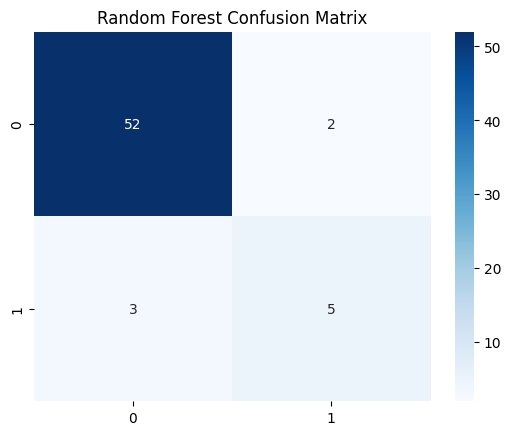

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()



Accuracy: 87.10%
              precision    recall  f1-score   support

           1       0.94      0.91      0.92        54
           2       0.50      0.62      0.56         8

    accuracy                           0.87        62
   macro avg       0.72      0.77      0.74        62
weighted avg       0.89      0.87      0.88        62



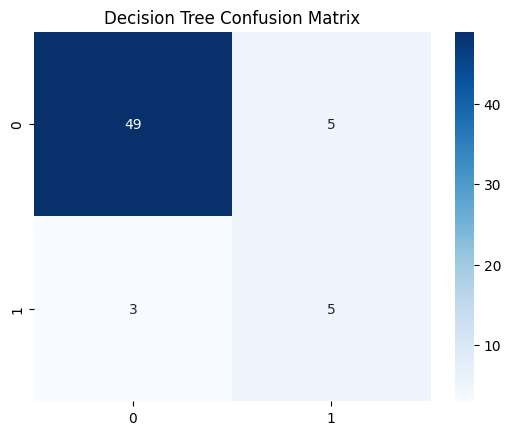

In [163]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()



Accuracy: 90.32%
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        54
           2       0.62      0.62      0.62         8

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



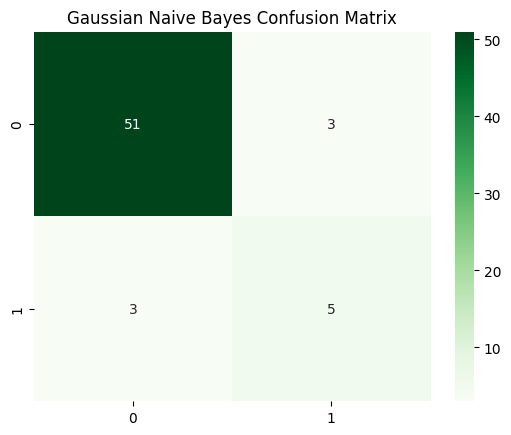

In [164]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()



In [165]:
y_pred = rf_classifier.predict(X_test_scaled)

test_indices = X_test_scaled.index

smoking_status_test = df.loc[test_indices, 'SMOKING']



In [166]:
smokers_idx = smoking_status_test[smoking_status_test == 2].index
nonsmokers_idx = smoking_status_test[smoking_status_test == 1].index


In [167]:
print("Performance on Non-Smokers:")
print(classification_report(y_test.loc[nonsmokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in nonsmokers_idx]]))

print("Performance on Smokers:")
print(classification_report(y_test.loc[smokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in smokers_idx]]))


Performance on Non-Smokers:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.50      0.50      0.50         2

    accuracy                           0.90        21
   macro avg       0.72      0.72      0.72        21
weighted avg       0.90      0.90      0.90        21

Performance on Smokers:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        35
           2       0.80      0.67      0.73         6

    accuracy                           0.93        41
   macro avg       0.87      0.82      0.84        41
weighted avg       0.92      0.93      0.92        41



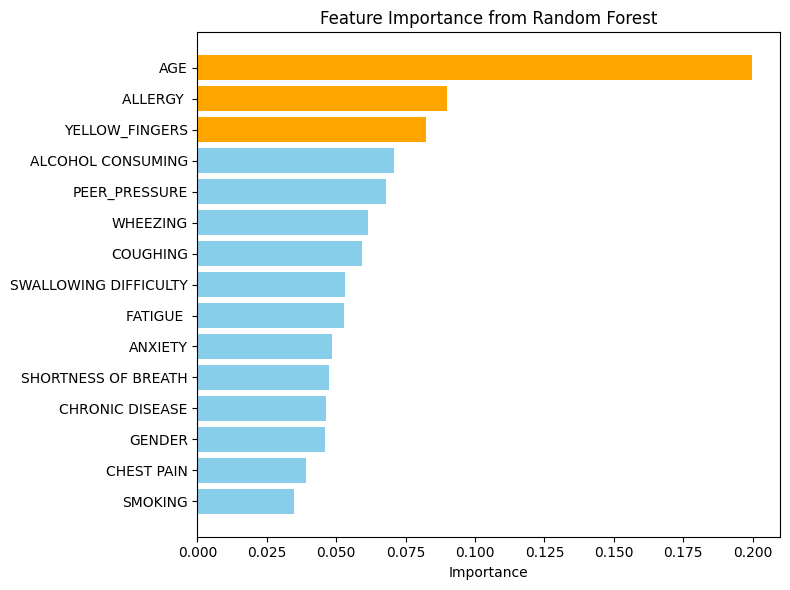

In [168]:
importances = rf_classifier.feature_importances_
features = X_train_scaled.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

colors = ['skyblue' if i < len(feat_imp) - 3 else 'orange' for i in range(len(feat_imp))]

plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color=colors)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


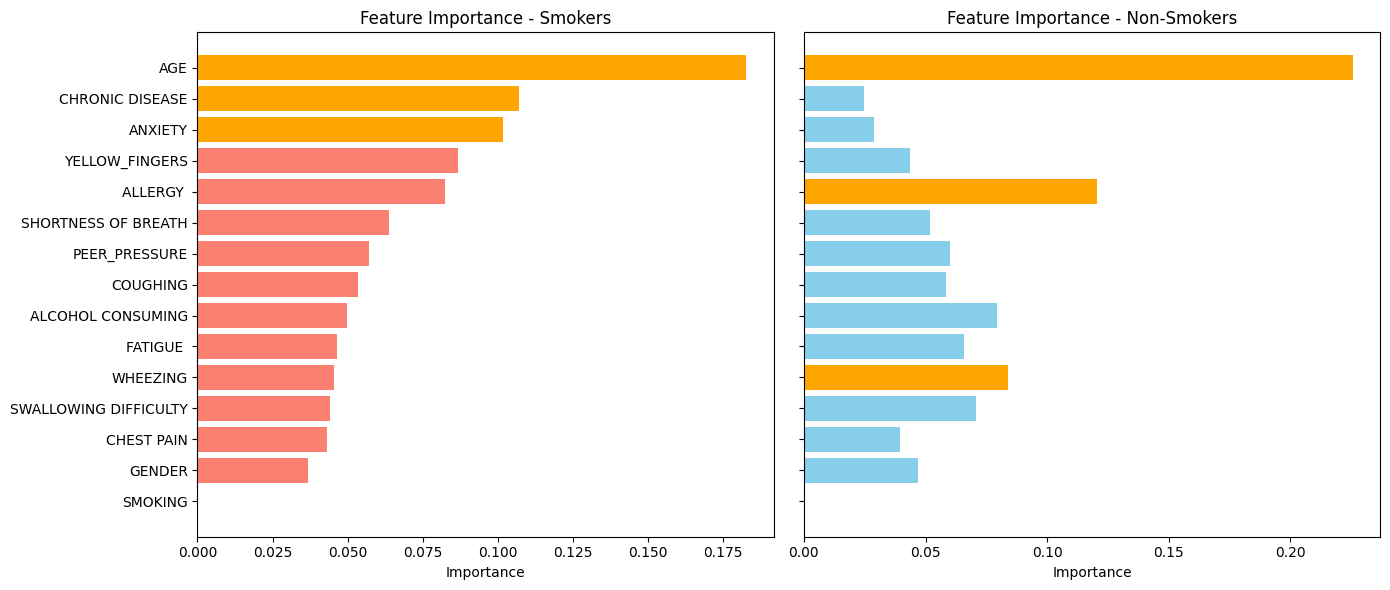

In [169]:
importances_smokers = rf_smokers.feature_importances_
importances_nonsmokers = rf_nonsmokers.feature_importances_
features = X_train_scaled.columns

feat_imp_smokers = pd.DataFrame({'Feature': features, 'Importance': importances_smokers})
feat_imp_nonsmokers = pd.DataFrame({'Feature': features, 'Importance': importances_nonsmokers})

feat_imp_smokers = feat_imp_smokers.sort_values(by='Importance', ascending=True)
feat_imp_nonsmokers = feat_imp_nonsmokers.sort_values(by='Importance', ascending=True)

colors_smokers = ['orange' if i >= len(feat_imp_smokers) - 3 else 'salmon' for i in range(len(feat_imp_smokers))]
colors_nonsmokers = ['orange' if i >= len(feat_imp_nonsmokers) - 3 else 'skyblue' for i in range(len(feat_imp_nonsmokers))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].barh(feat_imp_smokers['Feature'], feat_imp_smokers['Importance'], color=colors_smokers)
axes[0].set_title("Feature Importance - Smokers")
axes[0].set_xlabel("Importance")

axes[1].barh(feat_imp_nonsmokers['Feature'], feat_imp_nonsmokers['Importance'], color=colors_nonsmokers)
axes[1].set_title("Feature Importance - Non-Smokers")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()


In [170]:
test_indices = X_test_scaled.index
smoking_status_test = df.loc[test_indices, 'SMOKING']

smokers_idx = smoking_status_test[smoking_status_test == 2].index
nonsmokers_idx = smoking_status_test[smoking_status_test == 1].index

from sklearn.metrics import classification_report

print("Performance on Non-Smokers:")
print(classification_report(y_test.loc[nonsmokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in nonsmokers_idx]]))

print("Performance on Smokers:")
print(classification_report(y_test.loc[smokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in smokers_idx]]))



Performance on Non-Smokers:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.50      0.50      0.50         2

    accuracy                           0.90        21
   macro avg       0.72      0.72      0.72        21
weighted avg       0.90      0.90      0.90        21

Performance on Smokers:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        35
           2       0.80      0.67      0.73         6

    accuracy                           0.93        41
   macro avg       0.87      0.82      0.84        41
weighted avg       0.92      0.93      0.92        41



In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_evaluate(X, y, group_name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"\n--- {group_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(classification_report(y_test, y_pred))
    return rf, X_test, y_test, y_pred

rf_smokers, X_test_s, y_test_s, y_pred_s = train_evaluate(X_s, y_s, "Smokers")
rf_nonsmokers, X_test_ns, y_test_ns, y_pred_ns = train_evaluate(X_ns, y_ns, "Non-Smokers")



--- Smokers ---
Accuracy: 88.57%
              precision    recall  f1-score   support

           1       0.91      0.97      0.94        31
           2       0.50      0.25      0.33         4

    accuracy                           0.89        35
   macro avg       0.70      0.61      0.64        35
weighted avg       0.86      0.89      0.87        35


--- Non-Smokers ---
Accuracy: 85.19%
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        23
           2       0.00      0.00      0.00         4

    accuracy                           0.85        27
   macro avg       0.43      0.50      0.46        27
weighted avg       0.73      0.85      0.78        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


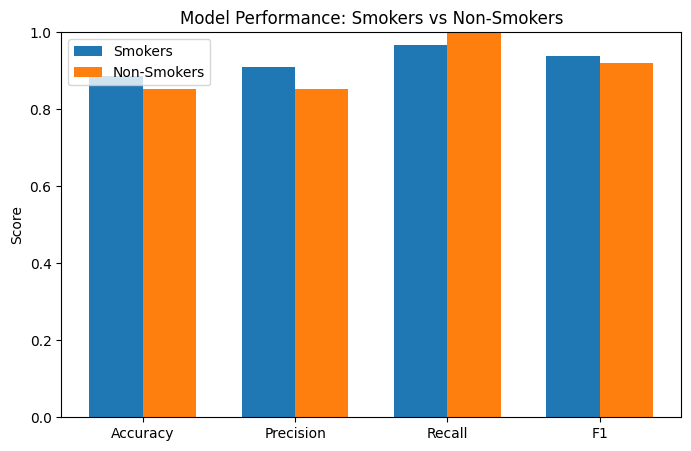

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

def get_scores(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, pos_label=1),
        'Recall': recall_score(y_true, y_pred, pos_label=1),
        'F1': f1_score(y_true, y_pred, pos_label=1)
    }

smoker_scores = get_scores(y_test_s, y_pred_s)
nonsmoker_scores = get_scores(y_test_ns, y_pred_ns)

labels = list(smoker_scores.keys())
smoker_vals = list(smoker_scores.values())
nonsmoker_vals = list(nonsmoker_scores.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, smoker_vals, width, label='Smokers')
plt.bar(x + width/2, nonsmoker_vals, width, label='Non-Smokers')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Model Performance: Smokers vs Non-Smokers')
plt.legend()
plt.ylim(0, 1)
plt.show()


In [173]:
smoker_probs = rf_smokers.predict_proba(X_s)[:, 1]
nonsmoker_probs = rf_nonsmokers.predict_proba(X_ns)[:, 1]


In [174]:
smokers_df['Predicted_Lung_Cancer_Risk'] = smoker_probs
non_smokers_df['Predicted_Lung_Cancer_Risk'] = nonsmoker_probs

smokers_df[['AGE', 'SMOKING', 'Predicted_Lung_Cancer_Risk']].head()


,AGE,SMOKING,Predicted_Lung_Cancer_Risk
1,74,2,0.05
3,63,2,0.70
6,52,2,0.04
7,51,2,0.00
8,68,2,0.90


<ipython-input-175-fd46e51e108a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(smokers_df['Predicted_Lung_Cancer_Risk'], label='Smokers', shade=True)
<ipython-input-175-fd46e51e108a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_smokers_df['Predicted_Lung_Cancer_Risk'], label='Non-Smokers', shade=True)


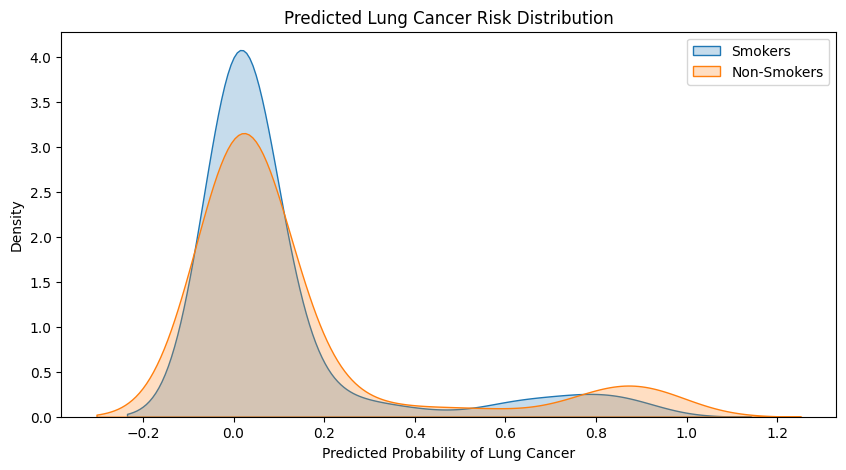

In [175]:
plt.figure(figsize=(10,5))
sns.kdeplot(smokers_df['Predicted_Lung_Cancer_Risk'], label='Smokers', shade=True)
sns.kdeplot(non_smokers_df['Predicted_Lung_Cancer_Risk'], label='Non-Smokers', shade=True)
plt.title('Predicted Lung Cancer Risk Distribution')
plt.xlabel('Predicted Probability of Lung Cancer')
plt.legend()
plt.show()


In [176]:
threshold = 0.5

smokers_df['Risk_Label'] = (smokers_df['Predicted_Lung_Cancer_Risk'] >= threshold).astype(int)
non_smokers_df['Risk_Label'] = (non_smokers_df['Predicted_Lung_Cancer_Risk'] >= threshold).astype(int)

print("High Risk in Smokers:")
print(smokers_df['Risk_Label'].value_counts())

print("\nHigh Risk in Non-Smokers:")
print(non_smokers_df['Risk_Label'].value_counts())


High Risk in Smokers:
Risk_Label
0    158
1     16
Name: count, dtype: int64

High Risk in Non-Smokers:
Risk_Label
0    119
1     16
Name: count, dtype: int64


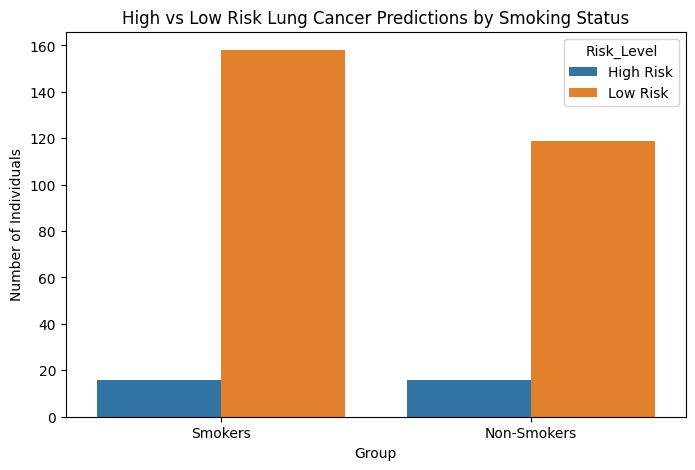

In [177]:
risk_counts_smokers = smokers_df['Risk_Label'].value_counts().to_dict()
risk_counts_nonsmokers = non_smokers_df['Risk_Label'].value_counts().to_dict()

risk_df = pd.DataFrame({
    'Group': ['Smokers', 'Non-Smokers'],
    'High Risk': [risk_counts_smokers.get(1, 0), risk_counts_nonsmokers.get(1, 0)],
    'Low Risk': [risk_counts_smokers.get(0, 0), risk_counts_nonsmokers.get(0, 0)]
})

risk_df_melt = risk_df.melt(id_vars='Group', var_name='Risk_Level', value_name='Count')

plt.figure(figsize=(8,5))
sns.barplot(x='Group', y='Count', hue='Risk_Level', data=risk_df_melt)
plt.title("High vs Low Risk Lung Cancer Predictions by Smoking Status")
plt.ylabel("Number of Individuals")
plt.show()



In [178]:
smokers_df.to_csv("smoker_risk_predictions.csv", index=False)
non_smokers_df.to_csv("nonsmoker_risk_predictions.csv", index=False)


In [179]:
summary = pd.DataFrame({
    'Group': ['Smokers', 'Non-Smokers'],
    'Total Individuals': [len(smokers_df), len(non_smokers_df)],
    'High Risk': [smokers_df['Risk_Label'].sum(), non_smokers_df['Risk_Label'].sum()],
    'Low Risk': [len(smokers_df) - smokers_df['Risk_Label'].sum(),
                 len(non_smokers_df) - non_smokers_df['Risk_Label'].sum()],
})
summary['High Risk (%)'] = (summary['High Risk'] / summary['Total Individuals']) * 100
summary


,Group,Total Individuals,High Risk,Low Risk,High Risk (%)
0,Smokers,174,16,158,9.195402
1,Non-Smokers,135,16,119,11.851852


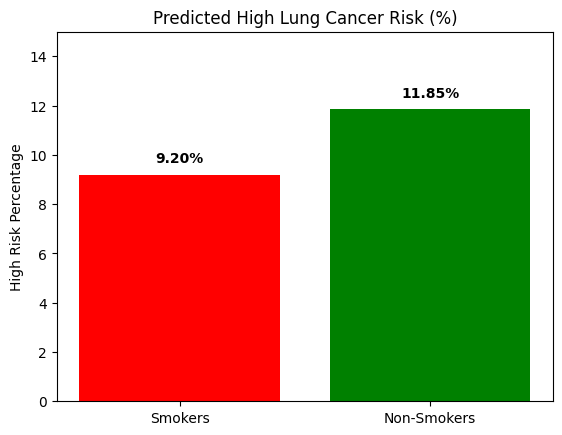

In [180]:
labels = ['Smokers', 'Non-Smokers']
risk_values = [9.20, 11.85]

plt.bar(labels, risk_values, color=['red', 'green'])
plt.ylabel("High Risk Percentage")
plt.title("Predicted High Lung Cancer Risk (%)")
for i, v in enumerate(risk_values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, 15)
plt.show()


In [181]:
non_smokers_df = df[df['SMOKING'] == 1].copy()

X_ns = non_smokers_df.drop(columns=['LUNG_CANCER'])
X_ns_scaled = X_ns.copy()
X_ns_scaled['AGE'] = scaler.transform(X_ns[['AGE']])

non_smokers_df['Risk_Prob'] = rf_classifier.predict_proba(X_ns_scaled)[:, 1]
non_smokers_df['Risk_Label'] = (non_smokers_df['Risk_Prob'] > 0.5).astype(int)


In [182]:
high_risk_ns = non_smokers_df[non_smokers_df['Risk_Label'] == 1]
low_risk_ns = non_smokers_df[non_smokers_df['Risk_Label'] == 0]

comparison = pd.DataFrame({
    'Feature': X_ns.columns,
    'High_Risk_Mean': high_risk_ns[X_ns.columns].mean().values,
    'Low_Risk_Mean': low_risk_ns[X_ns.columns].mean().values
})

comparison['Difference'] = comparison['High_Risk_Mean'] - comparison['Low_Risk_Mean']
comparison = comparison.sort_values(by='Difference', key=abs, ascending=False)

comparison


,Feature,High_Risk_Mean,Low_Risk_Mean,Difference
1,AGE,61.70,63.765217,-2.065217
8,ALLERGY,1.00,1.652174,-0.652174
10,ALCOHOL CONSUMING,1.20,1.652174,-0.452174
9,WHEEZING,1.30,1.686957,-0.386957
13,SWALLOWING DIFFICULTY,1.15,1.504348,-0.354348
11,COUGHING,1.35,1.704348,-0.354348
14,CHEST PAIN,1.20,1.539130,-0.339130
5,PEER_PRESSURE,1.25,1.573913,-0.323913
3,YELLOW_FINGERS,1.35,1.617391,-0.267391
7,FATIGUE,1.50,1.721739,-0.221739


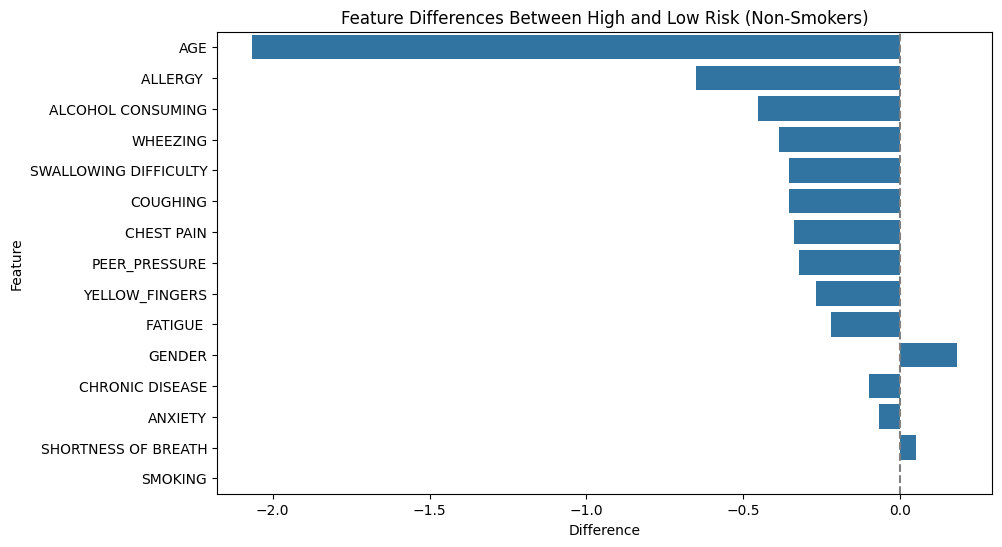

In [183]:
plt.figure(figsize=(10,6))
sns.barplot(x='Difference', y='Feature', data=comparison)
plt.title("Feature Differences Between High and Low Risk (Non-Smokers)")
plt.axvline(0, color='gray', linestyle='--')
plt.show()


SVM Accuracy: 90.32%
SVM - Classification Report
              precision    recall  f1-score   support

           1       0.93      0.96      0.95        54
           2       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



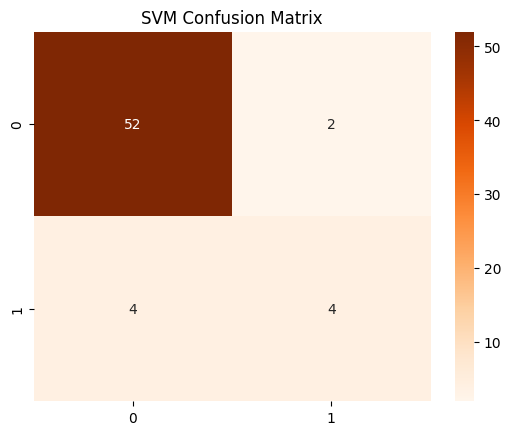

In [184]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("SVM - Classification Report")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.show()


In [185]:
y_binary = y.replace({1: 1, 2: 0})


In [186]:
X_train_scaled, X_test_scaled, y_train_bin, y_test_bin = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


XGBoost Accuracy: 87.10%
XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.94      0.91      0.92        54

    accuracy                           0.87        62
   macro avg       0.72      0.77      0.74        62
weighted avg       0.89      0.87      0.88        62



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


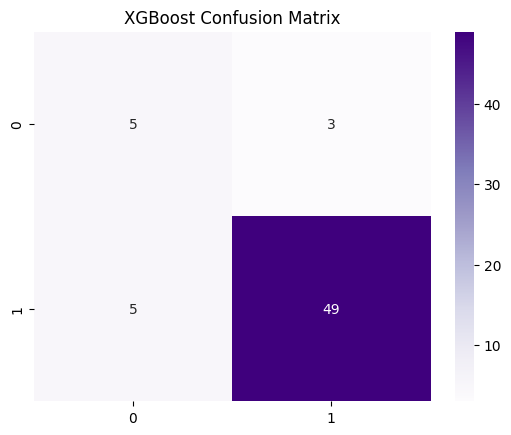

In [187]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_bin)

y_pred = xgb_model.predict(X_test_scaled)

print(f"XGBoost Accuracy: {accuracy_score(y_test_bin, y_pred)*100:.2f}%")
print("XGBoost - Classification Report")
print(classification_report(y_test_bin, y_pred))

sns.heatmap(confusion_matrix(y_test_bin, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.show()


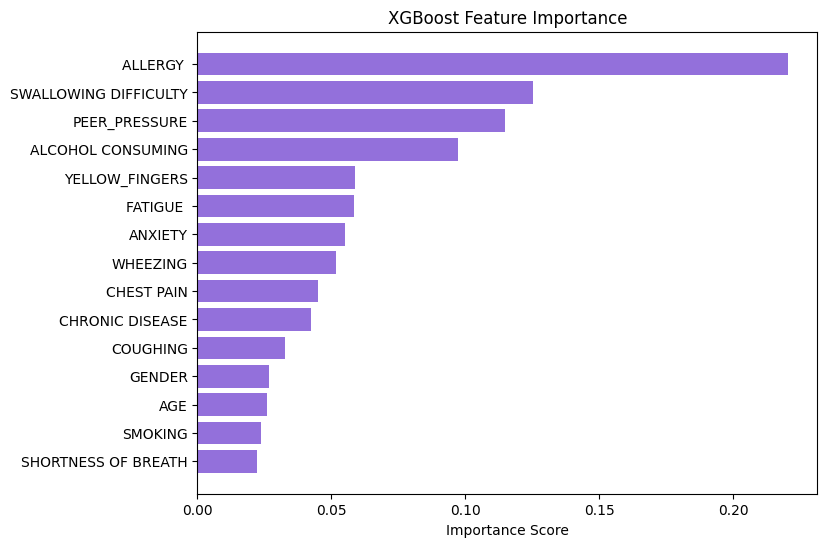

In [188]:
xgb_importance = xgb_model.feature_importances_
features = X_train_scaled.columns

xgb_feat_imp = pd.DataFrame({'Feature': features, 'Importance': xgb_importance})
xgb_feat_imp = xgb_feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(xgb_feat_imp['Feature'], xgb_feat_imp['Importance'], color='mediumpurple')
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [189]:
test_indices = X_test_scaled.index
smoking_status_test = df.loc[test_indices, 'SMOKING']

smokers_idx = smoking_status_test[smoking_status_test == 2].index
nonsmokers_idx = smoking_status_test[smoking_status_test == 1].index

print("XGBoost - Performance on Non-Smokers:")
print(classification_report(y_test_bin.loc[nonsmokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in nonsmokers_idx]]))

print("XGBoost - Performance on Smokers:")
print(classification_report(y_test_bin.loc[smokers_idx], y_pred[[X_test_scaled.index.get_loc(i) for i in smokers_idx]]))



XGBoost - Performance on Non-Smokers:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.90      0.90      0.90        20

    accuracy                           0.83        24
   macro avg       0.70      0.70      0.70        24
weighted avg       0.83      0.83      0.83        24

XGBoost - Performance on Smokers:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.97      0.91      0.94        34

    accuracy                           0.89        38
   macro avg       0.73      0.83      0.77        38
weighted avg       0.92      0.89      0.90        38



<ipython-input-190-fef656a55fb7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='magma')


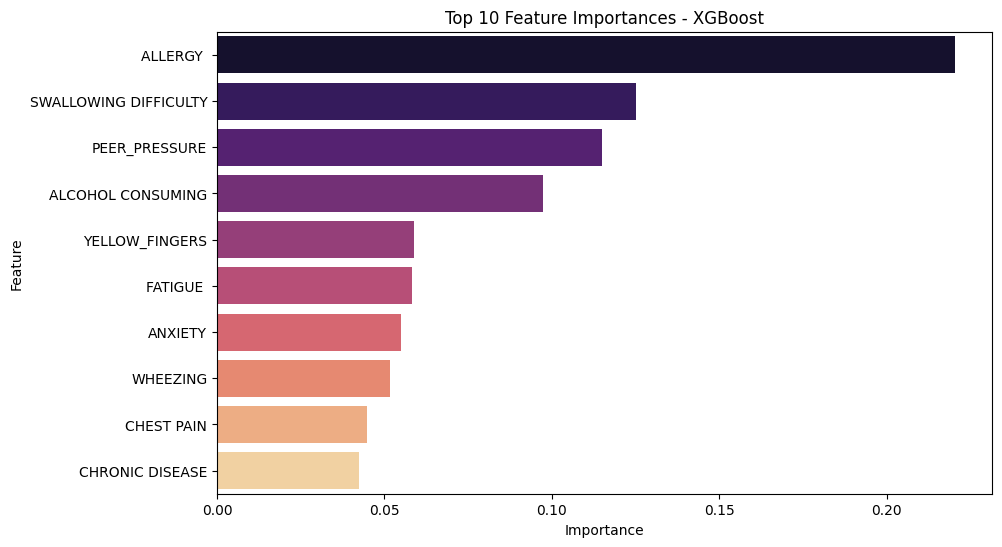

In [190]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='magma')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()


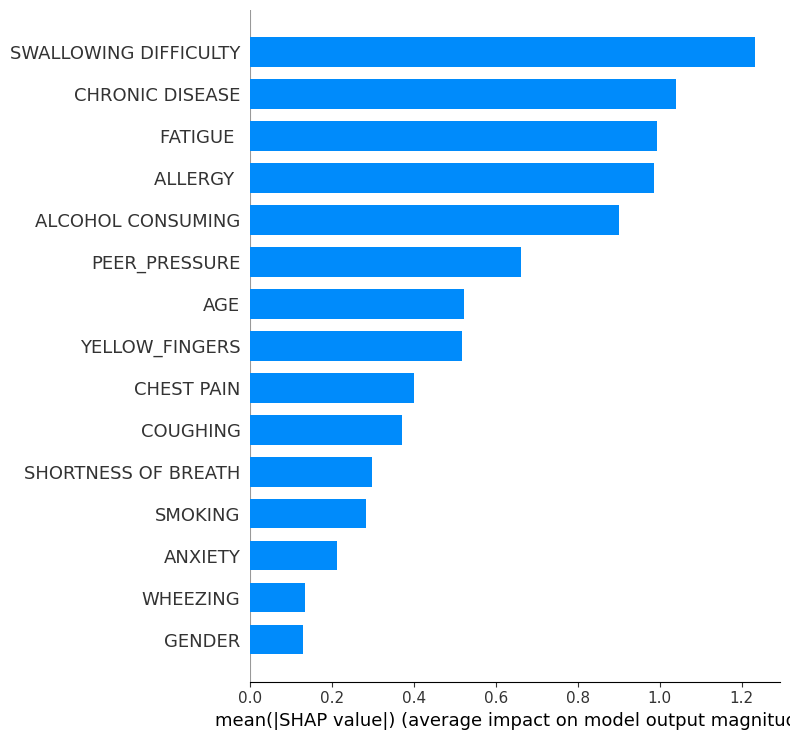

In [191]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)  # make sure this matches your model's input

plt.figure(figsize=(60,80))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


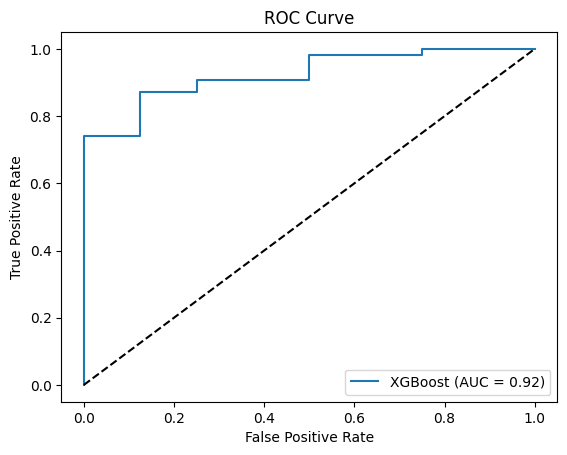

In [192]:
from sklearn.metrics import roc_curve, auc

y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


**Analysis of Feature Importances from XGBoost**

The bar chart displays the top 10 feature importances derived from an XGBoost model. Here’s how to interpret the key aspects:

**Key Features**
- **Allergy**: This feature has the highest importance, indicating it is the most influential predictor in the model.
- **Swallowing Difficulty**: The second most important feature, suggesting it significantly impacts the outcome.
- **Peer Pressure**: Ranked third, it may play a critical role in the model's predictions.
- **Alcohol Consuming**: This feature is also significant, highlighting drinking habits in relation to health outcomes.

**Supporting Features**
- **Yellow Fingers**: Likely tied to smoking or other health indicators.
- **Fatigue**: Indicates a common health concern that may affect other conditions.
- **Anxiety**: Stress factors that could be correlated with health issues.
- **Wheezing**: Suggestive of respiratory conditions.
- **Chest Pain**: Important for cardiovascular analysis.
- **Chronic Disease**: The least important feature in this context, but still relevant.

**Importance Scale**
- The importance values range from 0 to 0.20, showing a clear distinction in feature relevance.
- The features are sorted with the most impactful at the top, demonstrating the model's reliance on these specific predictors for its decisions.

This analysis can guide further investigation into each feature’s implications on health, and assist in making informed decisions based on the model's predictions.

This project demonstrates how structured survey data can be used to build predictive healthcare models.
It shows the power of ensemble models (like XGBoost) in improving prediction accuracy.
XGBoost, combined with SHAP, offered high performance.